# Accuracy of the Coefficients Estimates: **Standard Errors**

Different ways to access the accuracy of coefficient estimates

## Standard deviations of the estimators are also referred to as their "standard errors" of the estimator.

## Standard Error for B0 estimator:
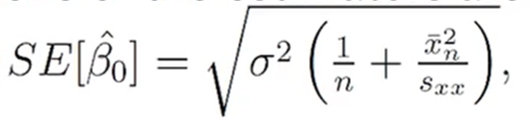

Here,
- variance (sigma square) is of the random error term
- n is the number of samples in our dataset
- xnbar is the sample average of the predictor values
- Ssubxx is a covariance like measure of the predictor values (also known as spread)
------------
## Standard Error for B1 Estimator:
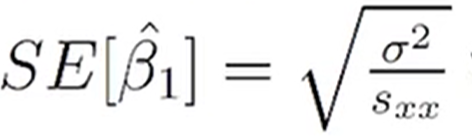

Variance:
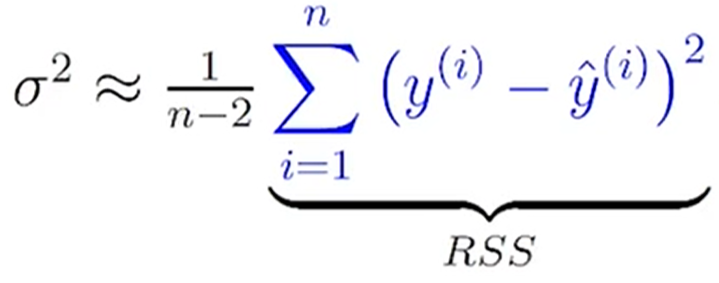

Here, we add all the squared residuals.
- This is the measure of what the model is leaving out.
- And when we avaerage it out we precisely get some estimate of the variance associated with the random error term.

`Note: The above are *in-sample* estimates and changes with change in datasets`

--------

### Assumptions of the random error term

Random error term E(i) is assumed to have
- zero mean
- constant variance
- zero correlation across the sample (uncorrelated across the samples in the dataset)

In [2]:
install.packages(c('ggplo2', 'dplyr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplo2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [3]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Generating Noisy Population data

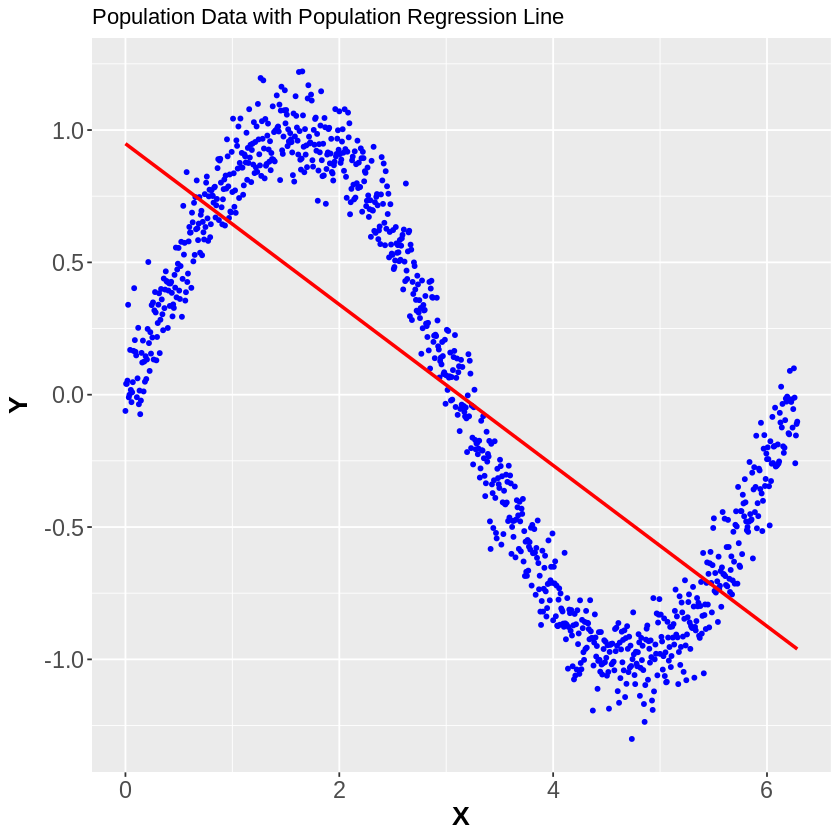

In [4]:
# Noisy sin function as a population model
nsamples = 1000
x = seq(0, 2*pi, length = nsamples)
y = sin(x) + rnorm(length(x), mean = 0, sd = 0.1)
popData = data.frame(x, y)
colnames(popData) = c('X', 'Y')

ggplot(data = popData, aes(x = X, y = Y)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'X', y = 'Y') +
   ggtitle("Population Data with Population Regression Line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

In [8]:
# Simple linear regression model and coefficient estimates
model = lm(data = popData, Y~X)
summary(model)
beta0 = summary(model)$coefficients["(Intercept)", "Estimate"]
beta1= summary(model)$coefficients["X", "Estimate"]


Call:
lm(formula = Y ~ X, data = popData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00974 -0.40838  0.00682  0.40064  1.05104 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.948397   0.028856   32.87   <2e-16 ***
X           -0.303898   0.007953  -38.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4566 on 998 degrees of freedom
Multiple R-squared:  0.594,	Adjusted R-squared:  0.5936 
F-statistic:  1460 on 1 and 998 DF,  p-value: < 2.2e-16


In [9]:
print(beta0)

[1] 0.9483971


In [10]:
print(beta1)

[1] -0.3038983


In [6]:
# Fitting SLRM using multiple datasets
ndatasets = 1000 # we will sample 1000 datasets
nsamples = 20 # each time the dataset will have 20 samples
beta_0_hat = numeric(ndatasets)
beta_1_hat = numeric(ndatasets)
serrorbeta_0  = numeric(ndatasets)
serrorbeta_1  = numeric(ndatasets)
for (j in seq(1, ndatasets)) {
  idx = sample(nrow(popData), nsamples)
  model = lm(data = popData[idx,], Y~X) # we will fit a linear model

  # storing beta0hat estimate and beta1hat estimate for all the datasets
  # along with the standard error associated with them
  beta_0_hat[j] = summary(model)$coefficients["(Intercept)", "Estimate"]
  beta_1_hat[j] = summary(model)$coefficients["X", "Estimate"]
  serrorbeta_0[j] = summary(model)$coefficients["(Intercept)", "Std. Error"]
  serrorbeta_1[j] = summary(model)$coefficients["X", "Std. Error"]
}

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


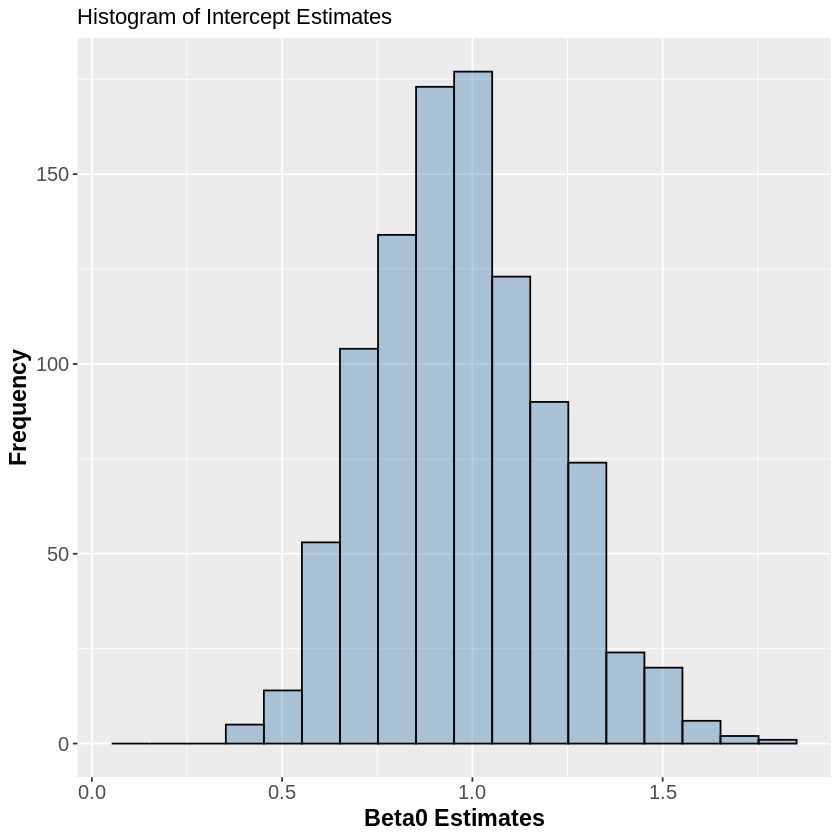

In [7]:
# Plot histogram of estimates from different datasets
dfbetaHat = as.data.frame(cbind(beta_0_hat, beta_1_hat, serrorbeta_0, serrorbeta_1))
colnames(dfbetaHat) = c('beta0hat', 'beta1hat', 'serrorbeta0hat', 'serrorbeta1hat')
beta = beta_0_hat
mu = mean(beta)
sigma = sd(beta)
delta = 0.1 # bin width for histogram
ggplot(data = dfbetaHat) +
  geom_histogram(aes(x = beta0hat, y = ..count..),
  breaks = seq(mu-4*sigma, mu+4*sigma, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Beta0 Estimates', y = 'Frequency')+
  ggtitle('Histogram of Intercept Estimates') +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

It looks normally distributed with central value around 0.9 wich is indeed our TRUE Beta0 value.

This was expected because we know that B0hat and B1hat are the unbiased estimator i.e., if we were to wvwerage out a large number of estimates, they will tend to get closer and closer to the true values.

In [12]:
# For beta0hat, calculate the 95% confidence interval estimates generated from# each dataset. After that, find the percentage of the intervals generated from all datasets that actually contain the true beta0 value.
# True beta0 value
print(beta0)
betaHat0_CI95 = cbind(dfbetaHat$beta0hat-2*dfbetaHat$serrorbeta0hat,
                      dfbetaHat$beta0hat+2*dfbetaHat$serrorbeta0hat)
#print(betaHat0_CI95) # confidence 95% confidence interval estimates
checkCI = function(data){
  return(between(beta0, data[1], data[2]))
}

[1] 0.9483971


In [13]:
mean(apply(betaHat0_CI95, 1, checkCI))*100

[1] 91.4

# How do we extract the "Standard Error"?

In [15]:
# Loading the mtcars dataset
file = '/content/mtcars1.csv'
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


In [16]:
# Converting categorical columns to represent factor levels
categorical_cols = c('cyl', 'vs', 'am', 'gear', 'carb')
carData[categorical_cols] = lapply(carData[categorical_cols], as.factor)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


In [17]:
#Print the first five rows (or samples) in the data frame
head(carData, 5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [37]:
# Fitting a simple linear regression model for mpg as a function of hp
model = lm(data = carData, mpg ~ hp)

# Printing summary of model
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


`As we can see, R is also calculationg the standard error associated with the estimates.`
- 1.63392 is the standard error associated with B0hat
- 0.01012 is the standard error associated with the B1hat

If were to increase Hp with 1 unit, the corresponding change in mpg will be by -0.06823 (B1hat).

### Standard errors of the estimates

In [19]:
# beta0hat standard error
print(summary(model)$coefficients['(Intercept)', 'Std. Error'])

[1] 1.633921


In [20]:
# beta1hat standard error
print(summary(model)$coefficients['hp', 'Std. Error'])

[1] 0.0101193


# Accuracy of the Coefficient Estimates: **Confidence Intervals**

The standard errors can be extended to calculate ***Confidence Intervals (CI)*** for population coefficients for β0 and β1.

- A 95% CI for β0 is:
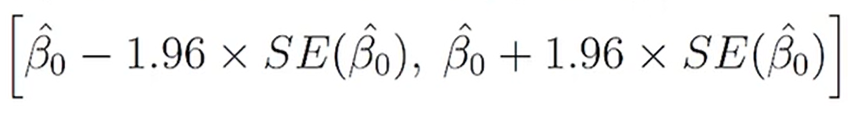

It's an interval with left-end and right-end. Here, we can be to the left of the estimate or to the right of the estimate.

`There is a 95% confidence that the true population parameter will be contained in this interval.`

- We have one dataset and one `CI` that comes out of it

Additional assumption:
The random error term E(i) is normally distributed


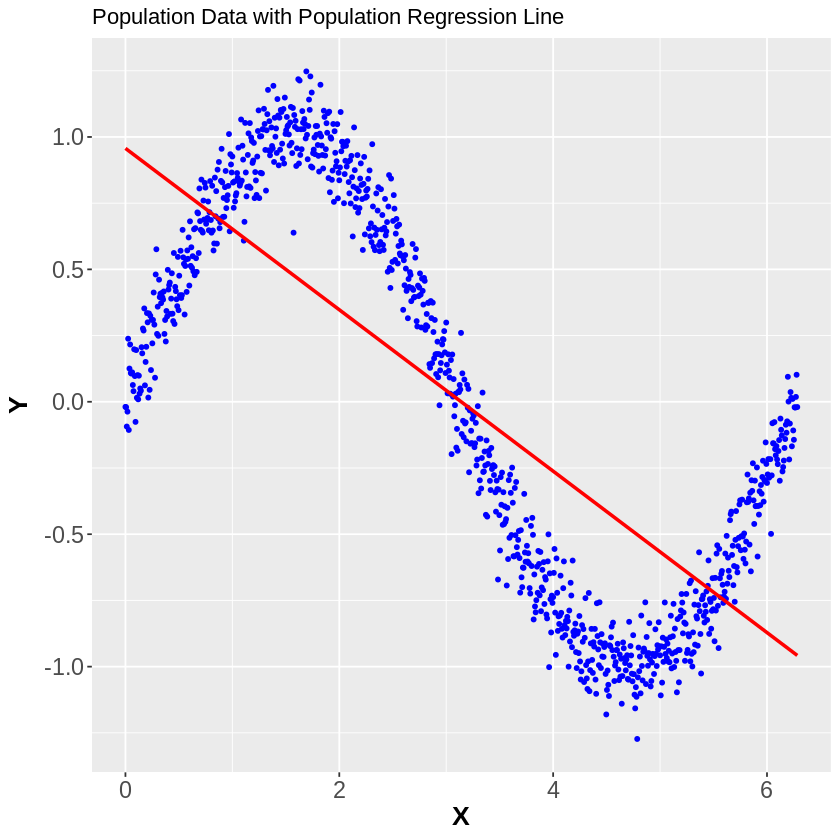

In [25]:
# Noisy sin function as a population model
nsamples = 1000
x = seq(0, 2*pi, length = nsamples)
y = sin(x) + rnorm(length(x), mean = 0, sd = 0.1)
popData = data.frame(x, y)
colnames(popData) = c('X', 'Y')

ggplot(data = popData, aes(x = X, y = Y)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'X', y = 'Y') +
   ggtitle("Population Data with Population Regression Line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

In [26]:
# Simple linear regression model and coefficient estimates
model = lm(data = popData, Y~X)
summary(model)
beta0 = summary(model)$coefficients["(Intercept)", "Estimate"]
beta1= summary(model)$coefficients["X", "Estimate"]
print(beta0)
print(beta1)


Call:
lm(formula = Y ~ X, data = popData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0537 -0.4059 -0.0160  0.4159  1.0579 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.956925   0.028868   33.15   <2e-16 ***
X           -0.304743   0.007956  -38.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4568 on 998 degrees of freedom
Multiple R-squared:  0.5952,	Adjusted R-squared:  0.5948 
F-statistic:  1467 on 1 and 998 DF,  p-value: < 2.2e-16


[1] 0.9569248
[1] -0.3047429


In [31]:
# Fitting SLRM using multiple datasets
ndatasets = 1000 # we will sample 1000 datasets
nsamples = 60 # each time the dataset will have 60 samples
beta_0_hat = numeric(ndatasets)
beta_1_hat = numeric(ndatasets)
serrorbeta_0  = numeric(ndatasets)
serrorbeta_1  = numeric(ndatasets)
for (j in seq(1, ndatasets)) {
  idx = sample(nrow(popData), nsamples)
  model = lm(data = popData[idx,], Y~X) # we will fit a linear model

  # storing beta0hat estimate and beta1hat estimate for all the datasets
  # along with the standard error associated with them
  beta_0_hat[j] = summary(model)$coefficients["(Intercept)", "Estimate"]
  beta_1_hat[j] = summary(model)$coefficients["X", "Estimate"]
  serrorbeta_0[j] = summary(model)$coefficients["(Intercept)", "Std. Error"]
  serrorbeta_1[j] = summary(model)$coefficients["X", "Std. Error"]
}

In [34]:
head(dfbetaHat)

,beta0hat,beta1hat,serrorbeta0hat,serrorbeta1hat
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7843205,-0.2347523,0.2178193,0.05436431
2,1.0123326,-0.2959026,0.1585075,0.04830680
3,0.9772823,-0.3033277,0.1771578,0.05468055
4,0.9057068,-0.2642836,0.2246529,0.05805528
5,0.9070797,-0.2987324,0.2420470,0.05784137
6,1.1754009,-0.3574151,0.1629769,0.04557872


In [32]:
# For beta0hat, calculate the 95% confidence interval estimates generated from# each dataset. After that, find the percentage of the intervals generated from all datasets that actually contain the true beta0 value.
# True beta0 value
print(beta0)
betaHat0_CI95 = cbind(dfbetaHat$beta0hat-2*dfbetaHat$serrorbeta0hat,
                      dfbetaHat$beta0hat+2*dfbetaHat$serrorbeta0hat)
#print(betaHat0_CI95) # confidence 95% confidence interval estimates
checkCI = function(data){
  return(between(beta0, data[1], data[2]))
}

[1] 0.9569248


In [33]:
mean(apply(betaHat0_CI95, 1, checkCI))*100

[1] 91.5

In [24]:
# 95% confidence intervals
beta0hat = summary(model)$coefficients['(Intercept)', 'Estimate']
beta1hat = summary(model)$coefficients['hp', 'Estimate']
serrorbeta0hat = summary(model)$coefficients['(Intercept)', 'Std. Error']
serrorbeta1hat = summary(model)$coefficients['hp', 'Std. Error']

In [22]:
# 95% CI for Beta0hat
cbind(beta0hat-1.96*serrorbeta0hat, beta0hat+1.96*serrorbeta0hat)

26.89638,33.30135


In [23]:
# 95% CI for Beta1hat
cbind(beta1hat-1.96*serrorbeta1hat, beta1hat+1.96*serrorbeta1hat)

-0.08806211,-0.04839444


So, we are 95% confident that 1 unit increase in hp will result in mpg going down approximately anywhere between -0.08806211	and -0.04839444 units.


# Accuracy of the Coefficient Estimates: **Hypothesis Tests**

Here, we want to check if there is indeed a relationship between mpg and hp.
- How close should B1hat be equal to 0 to conclude that there is no relationship?

`Null Hypothesis H0: B1 = 0`

There is no relationship between mpg and hp.

`Alternate Hypothesis H1: B1 != 0`

There is a significant relationship between mpg and hp.

----------

### Assuming that the null hypothesis is true, We have T distriubution:
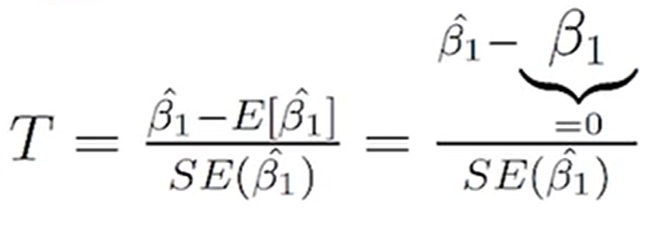

Here,
- B1hat is an estimator
- E[B1] is the expected value of B1hat

(We know that E[B1] = B1 because OLS estimates are unbiased estimates. Which we are assuming to be equal to 0.)
- SE(B1hat) is the standard error of B1hat

--------------

Assuming that the null hypothesis is True, it follows a t-distribution with `n-2` degrees of freedom.


In [38]:
# Fitting a simple linear regression model for mpg as a function of hp
model = lm(data = carData, mpg ~ hp)

# Printing summary of model
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


Here, we can see the t-value which is the realization of the random variable T.

These are the t-values associated with the B0hat and B1hat.

-----

Once we have estimated `B1hat` and the value of *T* which we denote as *t*:
-  We calculate *P(T >= |t|)* which is the probability of observing a realization of *T* that is even worse than what we observed in magnitude.
(What is the probability that T is actually greater than 6.7 which is the magnitue of -6.7.)
- If *p-value* is less than 0.05, than it means that the probalility of observing the *T* value even worse than what we observed in magnitude is very small.
- Equivalently, the probability of observing `B1hat` value much farther than 0 than what we observed in magnitude is going to be very small.

In [39]:
# Printing summary of model
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


Here, -6.742 is the realization of T.

t- distribution is like a normal distribution, if the value of ngets bigger, the t-distribution gets closer and closer to normal distribution.

--------

How likely is for us to observe key random variable that is more extreme than -6.742? Here, the probability is almost equals to 0 i.e., 1.79e-07. Very small probability.

Therefore, we reject the H0 and accept H1 and conclude there is a relationship bet hp and mpg.